<a href="https://colab.research.google.com/github/VilasSonawane/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Vilas_Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, **you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments.** The data is vizualized as it becomes easy to analyse data at instant. **The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.**

This could help in **clustering the restaurants into segments**. **Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **Question to be answered during Project**

# 1.Analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations.
# 2..cluster the zomato restaurants into different segments. 
# 3. The customers finding the Best restaurant in their locality and for the company to grow up 
# 4. The Analysis also solve some of the business cases that can directly helpand work on the fields they are currently lagging in.
# 5. Finding Current Buisness problem and Recomendation for Zommatoo To increse its buisness.
# 6. Clustering restarants into segments  
# 7. information around cuisine and costing which can be used in cost vs. benefit analysis
# 8. Sentiment analysis of custmer review
# 9. Identifying the critics in the industry based on the metadata of reviewers.

# **Trends/ Insights to be Explore**
# 1. Top 10 Restaurant costiler, cheapesst, afoordable
# 2. Top 10 Cuisines
# 3. Top 10 in different categories
# 4. Explore the timing columns
# 5. Most famous Restaurant based on user review /ratings
# 6. Most possitive ratings Most negative ratings
# 7. Top 10 Most active customers(Critics) based Review and follower
# 8. Most Populer Restaurant based no of customer visits etc.  

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
!pip install textblob

In [2]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# library to clean data
import re 
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Importing the libraries
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
restolist_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant names and Metadata.csv')

In [7]:
# Defining a function to scrape the content in the website and return the html script of the page
def send_request(url):
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',
            'url': url,  
        },
        
    )
    #print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.content)
    return response

In [8]:
# Creating a new column to store the html string of each url
restolist_df['content'] = np.nan

In [9]:
# Scraping through each url and storing the html string in the content column of the data frame
#for i,url in enumerate(names_df['Links']):
#  response = send_request(url)
#  content = response.content
#  names_df.loc[i,'content'] = str(content)

In [10]:
# Writing the dataframe to a csv to ensure no data loss in working
#names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')

In [99]:
names_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato_restaurant_names_new.csv')

In [12]:
# checking for null entries
sum(names_df['content'].isnull())

0

In [ ]:
names_df['content'][0]

In [14]:
# checking for null entries
sum(names_df['content'].isnull())

0

In [15]:
# Picking the latitude and longitude of the restaurants location
for i, content in enumerate(names_df['content']):
  # updating the string to a soup string to easily parse
  soup = str(BeautifulSoup(names_df.loc[i,'content'],"html.parser"))

  # Parsing the latitude and longitude
  tmp = list(re.finditer('https://maps.zomato.com/',soup))
  if len(tmp) == 0:
    names_df.loc[i,'latitude'] = np.nan
    names_df.loc[i,'longitude'] = np.nan
  else:
    loc = tmp[0].span()[0]
    geo_loc = re.findall('=.+&map',soup[loc:loc+200])[0][1:-4]
    names_df.loc[i,'latitude'] = geo_loc.split(',')[0]
    names_df.loc[i,'longitude'] = geo_loc.split(',')[1]

  # Parsing the List of additional services( as a dictionary item in the dataframe column)
  tmp_loc = re.search("More Info",str(soup))
  if tmp_loc==None:
    names_df.loc[i,'additional_services'] = np.nan
  else:
    more_loc = tmp_loc.span()[0]
    tmp = soup[more_loc:]
    inds = list(re.finditer('color="#4F4F4F"',tmp))
    services = list()
    for ind in inds:
      loc = ind.span()[0]
      services.append(re.findall('>.+</p',tmp[loc:loc+50])[0][1:-3])
    names_df.loc[i,'additional_services'] = str(services)
    
  # Identifying if the restaurant has featured in any of the best lists of the city - binary variable = 1 if featured, 0 otherwise
  names_df.loc[i,'Has_Featured'] = int(len(list(re.finditer('Featured In',soup)))>0)

  # Identifying what people associate this restaurant for
  inds = list(re.finditer("People Say This Place Is Known For",str(soup)))
  if len(inds) == 0:
    names_df.loc[i,'People say this is known for'] = np.nan
  else:
    ind = inds[0].span()[0]
    tmp = soup[ind:ind+500]
    names_df.loc[i,'People say this is known for']=re.findall('color="#4F4F4F">.+</p><h3',tmp)[0][16:-7]

In [16]:
# dropping the content column
names_df.drop('content',axis = 1,inplace = True)

In [17]:
names_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato_restaurant_names_new1.csv')

In [18]:
names_df.head()

,Unnamed: 0,Name,Links,Cost,Collections,Cuisines,Timings,latitude,longitude,additional_services,Has_Featured,People say this is known for
0,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",17.4288789799,78.3739606768,"['Home Delivery', 'Takeaway Available', 'Seati...",0.0,"Ambience and Service, Courteous Staffs, Cozy, ..."
1,1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,17.4423818301,78.3565796167,"['Home Delivery', 'Takeaway Available', 'Valet...",1.0,"Good Food Service, Good for Large Groups, Happ..."
2,2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",17.4352545759,78.3680872992,"['Home Delivery', 'Takeaway Available', 'Free ...",1.0,"Value of Money Food, Good for Large Groups, Co..."
3,3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,17.4267217841,78.3764155582,"['Home Delivery', 'Takeaway Available', 'Indoo...",1.0,"Delivered on Time, Big Restaurant, Food was Go..."
4,4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",17.4401549529,78.3619356528,"['Home Delivery', 'Full Bar Available', 'Free ...",1.0,"Music and Feel, Good Food and Good Service, Am..."


# **Data Exploration**

In [19]:
names_df.shape

(105, 12)

In [20]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    105 non-null    int64  
 1   Name                          105 non-null    object 
 2   Links                         105 non-null    object 
 3   Cost                          105 non-null    object 
 4   Collections                   51 non-null     object 
 5   Cuisines                      105 non-null    object 
 6   Timings                       104 non-null    object 
 7   latitude                      104 non-null    object 
 8   longitude                     104 non-null    object 
 9   additional_services           104 non-null    object 
 10  Has_Featured                  105 non-null    float64
 11  People say this is known for  96 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.0+ KB


In [21]:
# changing the data type of the cost function
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

In [22]:
float(names_df['latitude'][0])

17.4288789799

In [23]:
for i in names_df.index:
  names_df['latitude'][i]=float(names_df['latitude'][i])

In [24]:
for i in names_df.index:
  names_df['longitude'][i] = float(names_df['longitude'][i])

In [97]:
names_df.latitude.nunique()

104

## **So there is lot of variation and overlapping and its showing non uniformity in timing of the restaurants so then it will practically no use of this columns for clustering also and for exploratery data analysis.** 

In [26]:
# lets drop unnecessary columns from dataset
names_df.drop(['Unnamed: 0', 'Links','Timings'], axis=1, inplace = True)

In [27]:
names_df.head()

,Name,Cost,Collections,Cuisines,latitude,longitude,additional_services,Has_Featured,People say this is known for
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",17.428879,78.373961,"['Home Delivery', 'Takeaway Available', 'Seati...",0.0,"Ambience and Service, Courteous Staffs, Cozy, ..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",17.442382,78.35658,"['Home Delivery', 'Takeaway Available', 'Valet...",1.0,"Good Food Service, Good for Large Groups, Happ..."
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",17.435255,78.368087,"['Home Delivery', 'Takeaway Available', 'Free ...",1.0,"Value of Money Food, Good for Large Groups, Co..."
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",17.426722,78.376416,"['Home Delivery', 'Takeaway Available', 'Indoo...",1.0,"Delivered on Time, Big Restaurant, Food was Go..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",17.440155,78.361936,"['Home Delivery', 'Full Bar Available', 'Free ...",1.0,"Music and Feel, Good Food and Good Service, Am..."


# **Univariate Analysis**

Text(0.5, 1.0, 'Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad')

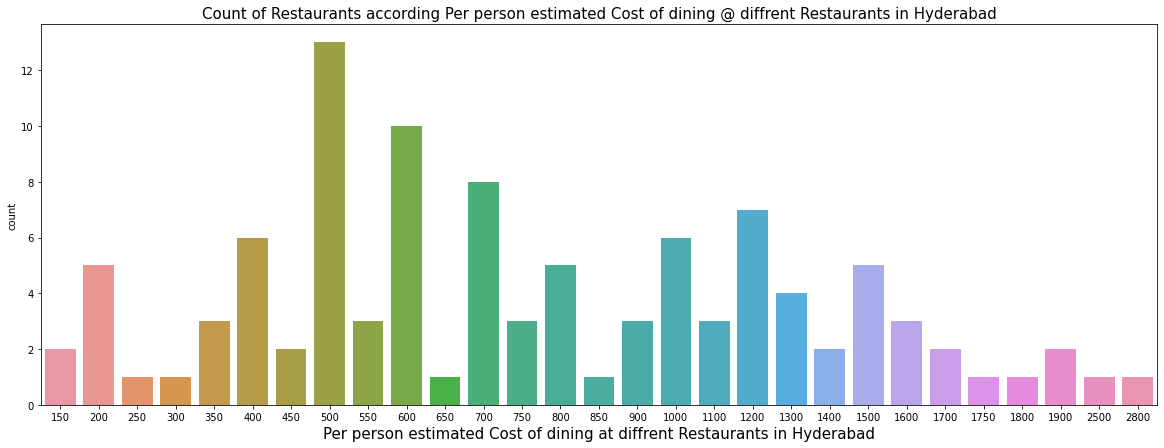

In [28]:
# Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad
plt.figure (figsize = (20,7))
p=sns.countplot(names_df.Cost)
p.set_xlabel("Per person estimated Cost of dining at diffrent Restaurants in Hyderabad",fontsize = 15)
plt.title("Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad",fontsize = 15)

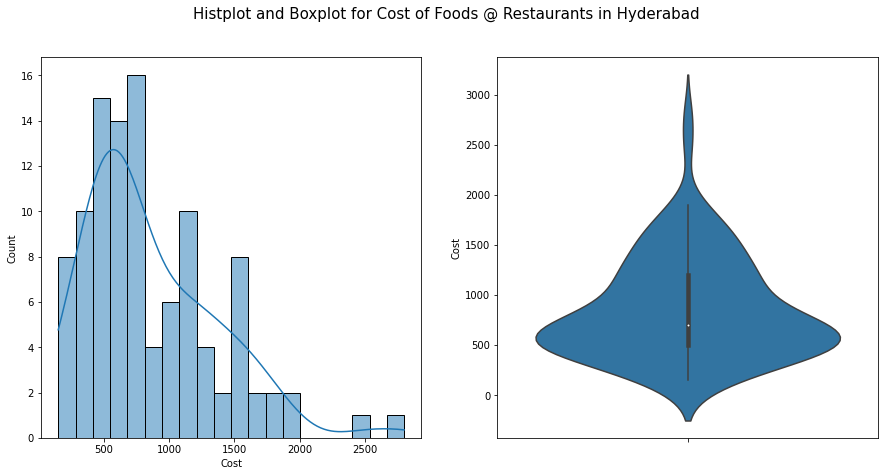

In [29]:
## Finding Cost distribution of Food Prices @ diffrent Restaurants in Hyderabad
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot for Cost of Foods @ Restaurants in Hyderabad',fontsize = 15)
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="Cost", bins=20,kde=True)
# BoxPlot
sns.violinplot(ax=axes[1],data=names_df, y="Cost",showmeans=True)

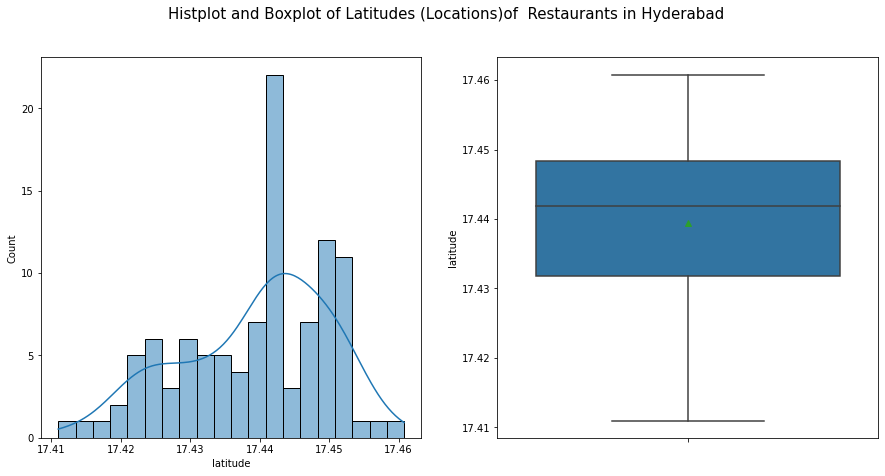

In [30]:
## 'Histplot and Boxplot of Latitudes (Locations)of  Restaurants in Hyderabad'
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot of Latitudes (Locations)of  Restaurants in Hyderabad',fontsize = 15)
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="latitude", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=names_df, y="latitude",showmeans=True)

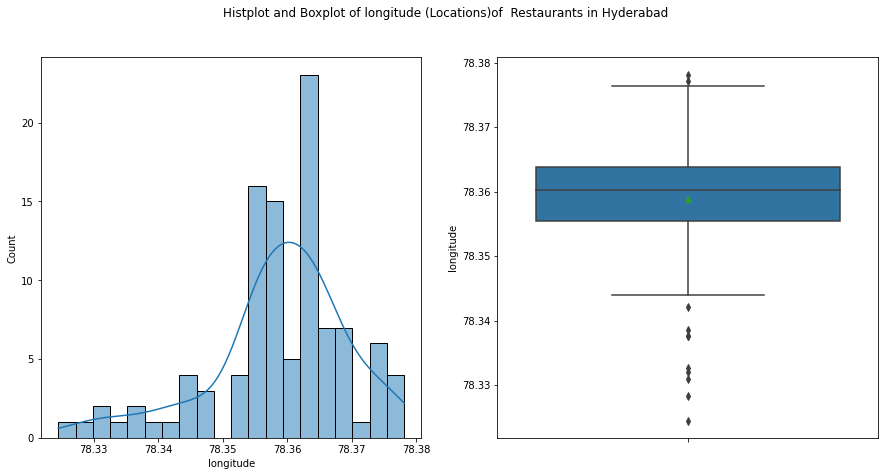

In [31]:
## 'Histplot and Boxplot of longitude (Locations)of  Restaurants in Hyderabad'
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot of longitude (Locations)of  Restaurants in Hyderabad')
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="longitude", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=names_df, y="longitude",showmeans=True)

# **Multivariate Analysis**

Text(0.5, 1.0, 'Per person estimated Cost of dining at different Location of Restaurants In Hyderabad')

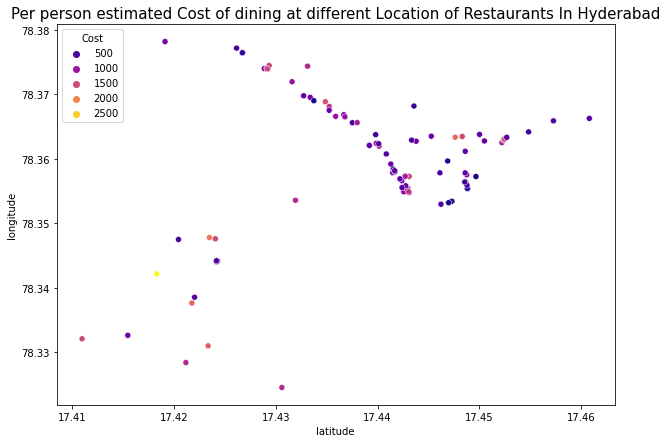

In [47]:
# Per person estimated Cost of dining at different Location of Restaurants In Hyderabad
plt.figure(figsize=(10,7))
sns.scatterplot(x="latitude", y="longitude",
                hue="Cost", palette="plasma",data=names_df)
plt.title('Per person estimated Cost of dining at different Location of Restaurants In Hyderabad',fontsize = 15)

In [52]:
!pip install  geopandas

     |████████████████████████████████| 1.0 MB 12.9 MB/s 
     |████████████████████████████████| 16.7 MB 46.4 MB/s 


In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [54]:
gdf = geopandas.GeoDataFrame(
    names_df, geometry=geopandas.points_from_xy(names_df.longitude, names_df.latitude))

In [58]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Name                          105 non-null    object  
 1   Cost                          105 non-null    int64   
 2   Collections                   51 non-null     object  
 3   Cuisines                      105 non-null    object  
 4   latitude                      104 non-null    object  
 5   longitude                     104 non-null    object  
 6   additional_services           104 non-null    object  
 7   Has_Featured                  105 non-null    float64 
 8   People say this is known for  96 non-null     object  
 9   geometry                      105 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(7)
memory usage: 8.3+ KB


In [88]:
x= gdf.loc[0:,['Name','latitude','longitude','geometry']]

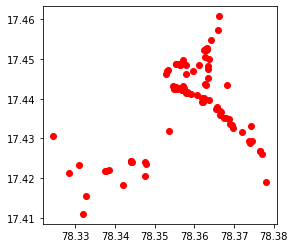

<Figure size 720x504 with 0 Axes>

In [90]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'India'].plot(
    color='white', edgecolor='black')
plt.figure(figsize=(10,7))
# We can now plot our ``GeoDataFrame``.
x.plot(ax=ax, color='red')

plt.show()

In [70]:
! pip install folium

In [92]:
x=names_df[~names_df.latitude.isnull()]

In [93]:
import folium
mapit = folium.Map(location=[17.3850, 78.4867])
for i in x.index:
    folium.Marker( location=[ x.latitude[i], x.longitude[i] ]).add_to( mapit )

mapit.save( 'map.html')

In [94]:
mapit

# **Top 10 Most Expensive restaurant Hyderabad.**

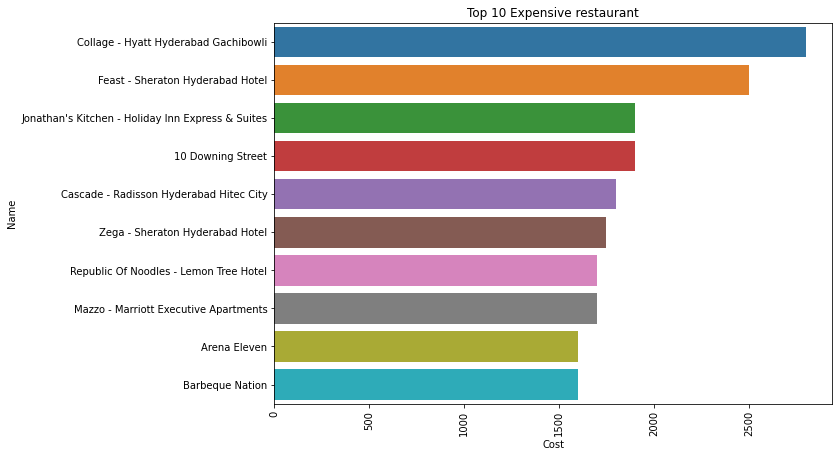

In [34]:
# checking for most expensive Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(x='Cost',
            y="Name", 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[:10])
plt.setp(plot.get_xticklabels(), rotation = 90)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Expensive restaurant')
plt.show()

# **10 Most Affordable restaurant Restaurant in Hyderabad**

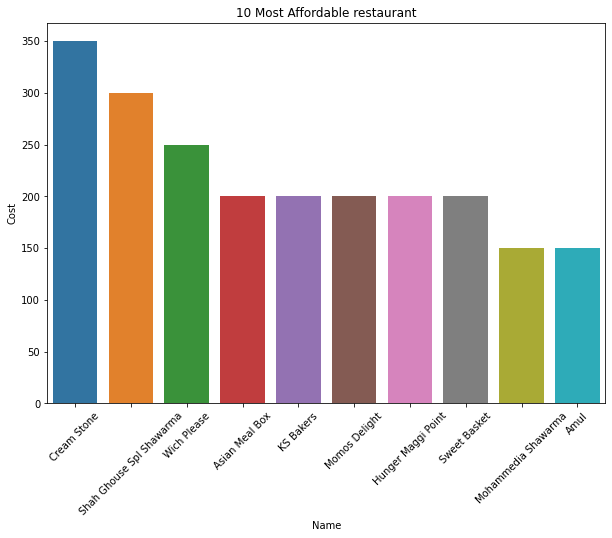

In [35]:
# checking for 10 Most Affordable restaurant Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(y='Cost',
            x="Name", 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[-10:])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most Affordable restaurant')
plt.show()

In [36]:
# spliting the cusines and storing in list 
cuisine_list=names_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [37]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1

In [38]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

In [39]:
cuisine_df.head()

,Cuisine,Number of Restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,9


# **Top 10 most served cusines in restaurants of Hyderabad**

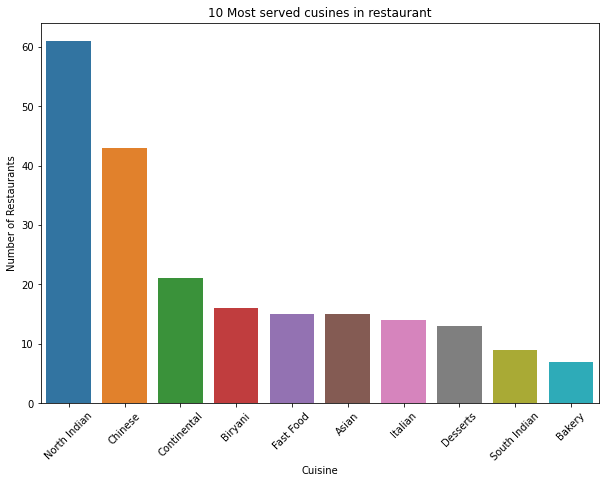

In [40]:
# graph for most cusines served in restaurant
plt.figure(figsize= (10,7))
plot = sns.barplot(x='Cuisine',
            y="Number of Restaurants", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:10])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most served cusines in restaurant')
plt.show()

In [41]:
# spliting the cusines and storing in list 
Collections_list=names_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [42]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1

In [43]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs', 0:'Number of Restaurants'}).sort_values(by=['Number of Restaurants'],ascending = False)
Collections_df.head()

,Taggs,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


# **10 Most used Taggs By restaurants in Hyderabad**

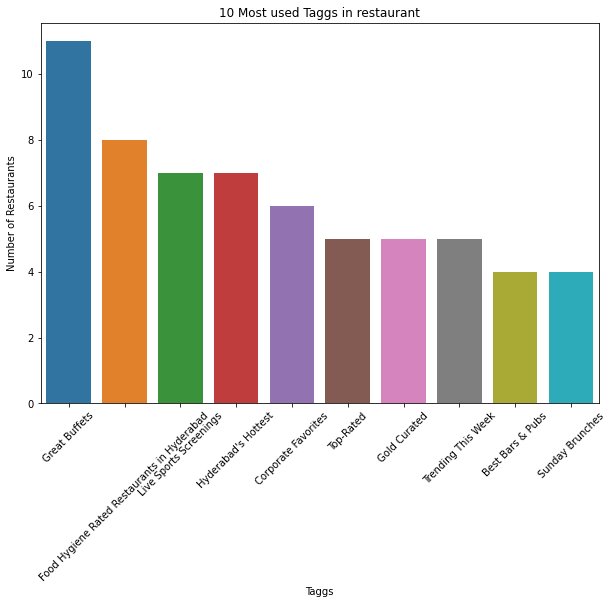

In [44]:
# graph for 10 Most used Taggs in restaurant 
plt.figure(figsize= (10,7))
plot =sns.barplot(x='Taggs',
            y="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:10])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most used Taggs in restaurant')
plt.show()

In [ ]:
# Let us define a function to convert the string of column to integer
def str_to_int(input_str):
  '''
  This function  converts the string format column elements to integer format
  '''
  result = int(float(input_str.replace(',','')))
  return result

In [ ]:
def str_to_list (text):
  return text.split(", ")

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant reviews.csv')

In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review_df.shape

(10000, 7)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
review_df.Review.isnull().sum()

45

In [ ]:
newreview_df= review_df[~review_df.Review.isnull()].reset_index() 

In [ ]:
newreview_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
newreview_df.Rating.unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
newreview_df[newreview_df.Rating=='Like']

,index,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7597,7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [ ]:
# So Lets repalce the "Like" into Rating "5"
newreview_df.Rating = newreview_df.Rating.replace('Like', '5')

In [ ]:
# So lets convert Rating column from string to float Type format
newreview_df.Rating= newreview_df.Rating.str.replace(' ', '').astype(float)

In [ ]:
# So lets Convert Time column from string to datetime Format
newreview_df.Time = pd.to_datetime(newreview_df.Time)

In [ ]:
# Lets Separate Time and date from Time Coulmn
newreview_df['Date'] = pd.to_datetime(newreview_df['Time']).dt.date
newreview_df['Newtime'] = pd.to_datetime(newreview_df['Time']).dt.time


In [ ]:
# So lets Convert Date column from string to datetime Format
newreview_df['Date'] = pd.to_datetime(newreview_df['Date'])


In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       9955 non-null   int64         
 1   Restaurant  9955 non-null   object        
 2   Reviewer    9955 non-null   object        
 3   Review      9955 non-null   object        
 4   Rating      9955 non-null   float64       
 5   Metadata    9955 non-null   object        
 6   Time        9955 non-null   datetime64[ns]
 7   Pictures    9955 non-null   int64         
 8   Date        9955 non-null   datetime64[ns]
 9   Newtime     9955 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 777.9+ KB


In [ ]:
out = pd.DataFrame(newreview_df['Metadata'].str.split(',',1).tolist(),columns=['No_of_review','No_of_Follower'])
x=pd.DataFrame(out['No_of_review'].str.split(' ',1).tolist(),columns=['No_of_review','Review'])
newreview_df['No_of_review'] = x['No_of_review']

In [ ]:
out.No_of_Follower.isnull().sum()

1574

In [ ]:
out['No_of_Follower'].fillna(" 0 Follower", inplace = True)

In [ ]:
z=pd.DataFrame(out['No_of_Follower'].str.split(' ',2).tolist(),columns=['space','No_ofFollower','follower'])
newreview_df['No_of_Follower'] = z['No_ofFollower']

In [ ]:
# So lets convert No_of_Follower & No_of_review column from string to float Type format
newreview_df.No_of_review = newreview_df.No_of_review.str.replace(' ', '').astype(float)
newreview_df.No_of_Follower = newreview_df.No_of_Follower .str.replace(' ', '').astype(float)

In [ ]:
newreview_df.drop(['Time','Metadata',],axis =1 , inplace = True)

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9955 non-null   int64         
 1   Restaurant      9955 non-null   object        
 2   Reviewer        9955 non-null   object        
 3   Review          9955 non-null   object        
 4   Rating          9955 non-null   float64       
 5   Pictures        9955 non-null   int64         
 6   Date            9955 non-null   datetime64[ns]
 7   Newtime         9955 non-null   object        
 8   No_of_review    9955 non-null   float64       
 9   No_of_Follower  9955 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 777.9+ KB


Text(0.5, 1.0, 'Rating Given By Number of Customer')

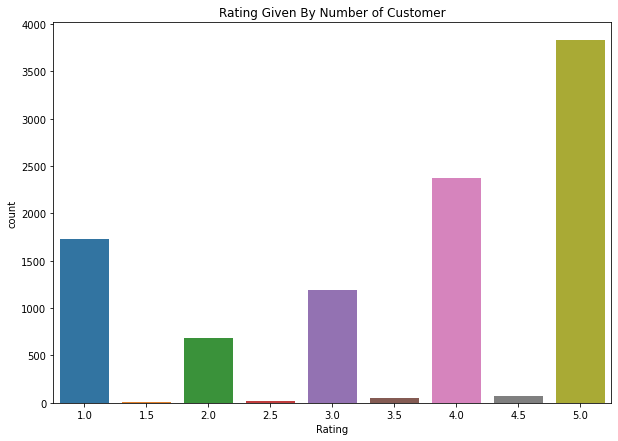

In [ ]:
plt.figure (figsize = (10,7))
sns.countplot(newreview_df.Rating)
plt.title("Rating Given By Number of Customer")

# **Sentiment Analysis**
## **Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context.**

In [ ]:
# Lets Create Function to Clean Review Text
def clean_review(review):
        '''
        Utility function to clean Review text by removing links, special characters
        using simple regex statements.
        '''
        review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review)
        review = review.lower()
    # split to array(default delimiter is " ")
        review = review.split()
    # in string array at ith row   
        review = [word for word in review if not word in set(stopwords.words('english'))]             
    # rejoin all string array elements
    # to create back into a string
        review = ' '.join(review)   
        return review
  

In [ ]:
def get_review_sentiment(review):
        '''
        Utility function to classify sentiment of passed Review
        using textblob's sentiment method
        '''
        # create TextBlob object of passed Review
        analysis = TextBlob(clean_review(review))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [ ]:
def getSubjectivity(review):
   return TextBlob(clean_review(review)).sentiment.subjectivity

In [ ]:
def getPolarity(review):
  return TextBlob(clean_review(review)).sentiment.polarity

In [ ]:
# Get Clean Review Column
newreview_df['clean_review'] = newreview_df['Review'].apply(clean_review )

In [ ]:
# Get Sentiment Polarity
newreview_df['Sentiment_Polarity'] = newreview_df['Review'].apply(getPolarity )


In [ ]:
# Get Sentiment Subjectivity
newreview_df['Sentiment_Subjectivity'] = newreview_df['Review'].apply(getSubjectivity )

In [ ]:
# Get Sentiment Analysis
newreview_df['Sentiment'] = newreview_df['Review'].apply(get_review_sentiment )

In [ ]:
newreview_df.head()

,index,Restaurant,Reviewer,Review,Rating,Pictures,Date,Newtime,No_of_review,No_of_Follower,clean_review,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25,15:54:00,1.0,2.0,ambience good food quite good saturday lunch c...,0.660000,0.720000,positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25,14:20:00,3.0,2.0,ambience good pleasant evening service prompt ...,0.708333,0.691667,positive
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24,22:54:00,2.0,3.0,must try great food great ambience thnx servic...,0.550000,0.675000,positive
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24,22:11:00,1.0,1.0,soumen das arun great guy behavior sincerety g...,0.750000,0.675000,positive
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24,21:37:00,3.0,2.0,food good ordered kodi drumsticks basket mutto...,0.560000,0.540000,positive


In [ ]:
import seaborn as sns

# **Customer Sentiment Analysis**

Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity')

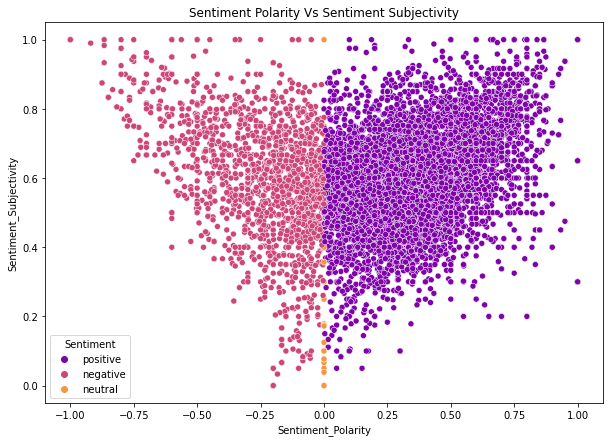

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Sentiment", palette="plasma",data=newreview_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity')

## **1.Sentiment Polarity lies between [-1,1], -1 defines a negative sentiment, 1 defines a positive sentiment and 0 defines neutral sentiment.**

## **2. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.**


Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

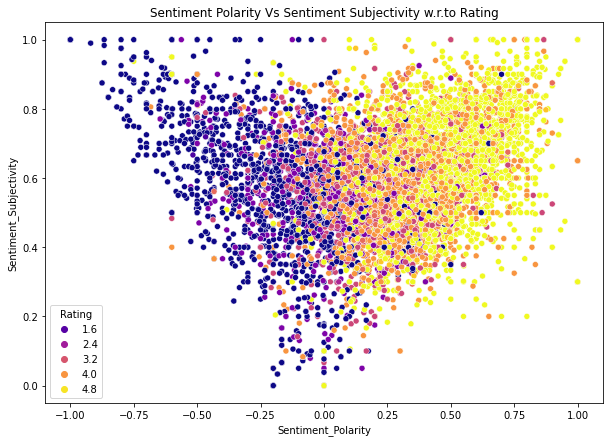

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity with respective Rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Rating", palette="plasma",data=newreview_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

In [ ]:
A= newreview_df.Sentiment.value_counts()
A

positive    7624
negative    1835
neutral      496
Name: Sentiment, dtype: int64

In [ ]:
import seaborn as sns

# **Overall Customer Sentiment Based On Review**

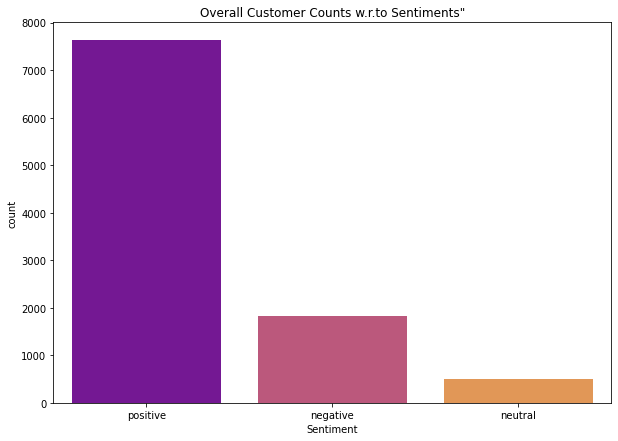

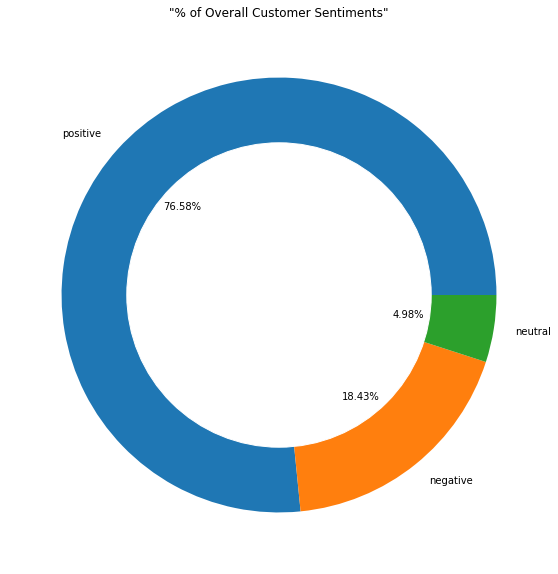

In [ ]:
# Overall Customer Sentiment Based On Review
plt.figure(figsize=(10,7))
plt.title('Overall Customer Counts w.r.to Sentiments"')
sns.countplot(data=newreview_df, x="Sentiment", palette="plasma")

#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( A ,labels=A.index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"% of Overall Customer Sentiments"')
plt.show()

In [ ]:
newreview_df.Restaurant.value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

In [ ]:
df = newreview_df.groupby(by =newreview_df.Restaurant)['Sentiment_Polarity','Sentiment_Subjectivity','Rating'].mean().sort_values(by=['Sentiment_Polarity'],ascending = False).reset_index()

## **Top 10 (Most Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

In [ ]:
df.rename(columns={'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity','Rating':'Average_Rating'}, inplace = True)
df

,Restaurant,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Average_Rating
0,AB's - Absolute Barbecues,0.587395,0.715231,4.880000
1,Flechazo,0.526417,0.661154,4.660000
2,"3B's - Buddies, Bar & Barbecue",0.518821,0.684991,4.760000
3,B-Dubs,0.497512,0.644784,4.810000
4,The Indi Grill,0.482232,0.608736,4.600000
...,...,...,...,...
95,Domino's Pizza,0.071351,0.578642,3.070707
96,KFC,0.062730,0.544871,2.850000
97,Asian Meal Box,0.053010,0.519008,2.580000
98,Pakwaan Grand,0.048103,0.591807,2.710000


Text(0.5, 1.0, 'Top 10 Restaurants in Hyderabad (Based On Customer Review)')

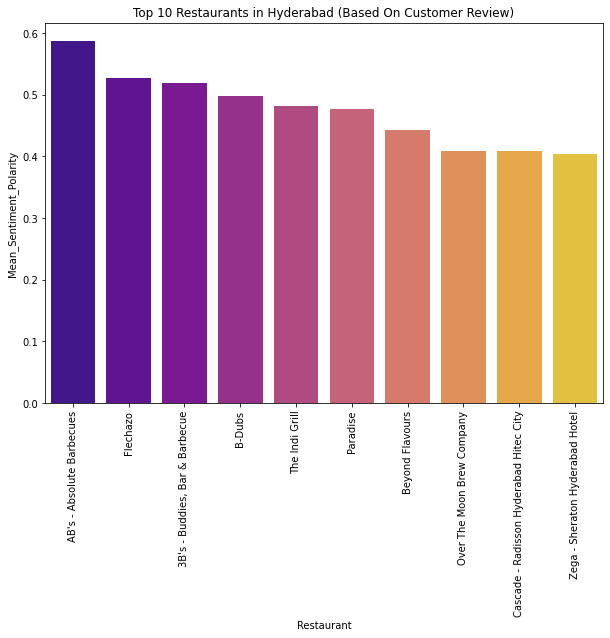

In [ ]:
# Top 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df.head(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Restaurants in Hyderabad (Based On Customer Review)')

Text(0.5, 1.0, 'Average Ratings of Restaurants in Hyderabad')

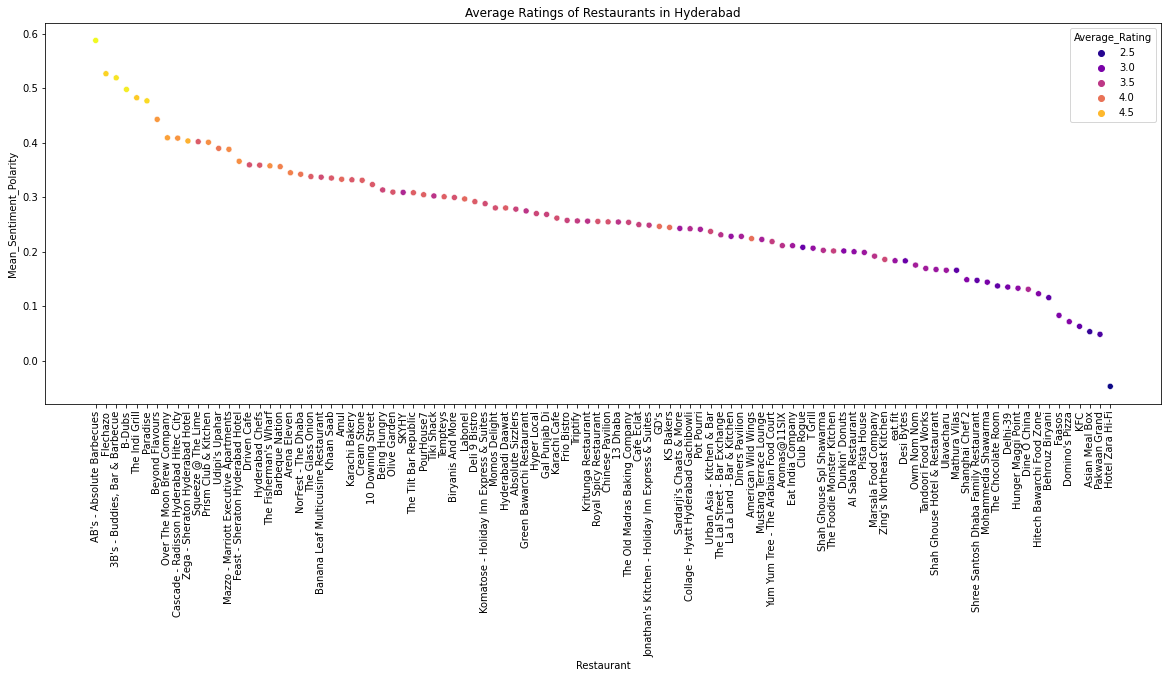

In [ ]:
# Lets find 'Average Ratings of Restaurants in Hyderabad'
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Polarity", x="Restaurant", hue ='Average_Rating',
                 palette="plasma",data=df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Average Ratings of Restaurants in Hyderabad')

## **So Restaurant AB's Absoulute Barbecues is the Most populer Restaurant in Hyderabad based on customer reviews and Average Rating. Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity around 0.59 & Minimum average Rating of Customers, Means Most of the Customer has given +ve review about the services provide by Restaurants.**

## **Worst 10 (Least Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

Text(0.5, 1.0, ' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

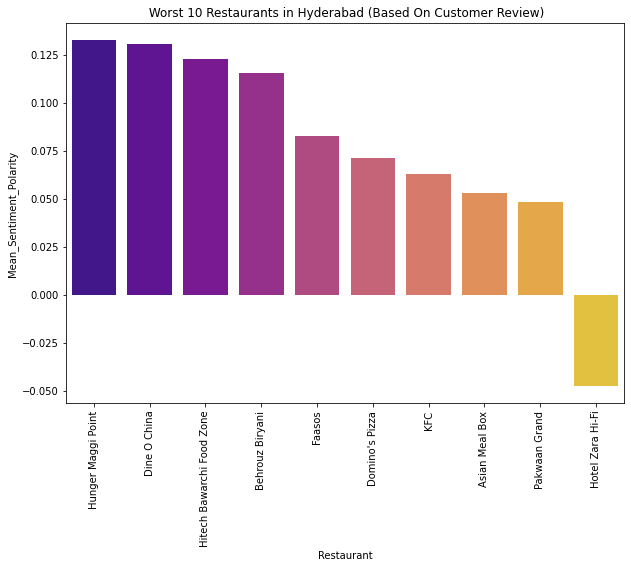

In [ ]:
# Worst 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=df.tail(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title(' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

## **So Restaurant Zara Hi Fi is the least populer restaurant in Hyderabad Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity -0.050, Means Most of the Customer has given -ve review about the services offered by Restaurant.**

In [ ]:
newreview_df.describe()

,index,Rating,Pictures,No_of_review,No_of_Follower,Sentiment_Polarity,Sentiment_Subjectivity
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,4983.462883,3.600402,0.751984,24.006730,163.108086,0.263653,0.582577
std,2882.460164,1.483565,2.575691,50.629274,620.153289,0.364243,0.205551
min,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2489.500000,3.000000,0.000000,1.000000,1.000000,0.025000,0.500000
50%,4978.000000,4.000000,0.000000,4.000000,7.000000,0.300000,0.600000
75%,7469.500000,5.000000,0.000000,22.000000,63.000000,0.528175,0.700000
max,9999.000000,5.000000,64.000000,1031.000000,13410.000000,1.000000,1.000000


In [ ]:
newreview_df[newreview_df.No_of_review==1031]

,index,Restaurant,Reviewer,Review,Rating,Pictures,Date,Newtime,No_of_review,No_of_Follower,clean_review,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
3123,3124,Pista House,Anvesh Chowdary,Tried the zafrani 65 biryani and then butter c...,4.0,0,2019-02-14,22:23:00,1031.0,1654.0,tried zafrani 65 biryani butter chicken along ...,0.450000,0.787500,positive
7293,7297,Labonel,Anvesh Chowdary,This place stays in the best 5 bakeries in the...,4.0,0,2016-10-27,00:42:00,1031.0,1654.0,place stays best 5 bakeries city chocolate cak...,0.491667,0.363889,positive
9163,9208,Collage - Hyatt Hyderabad Gachibowli,Anvesh Chowdary,I don't expect how people are maintaining the ...,2.0,0,2019-04-04,22:37:00,1031.0,1654.0,expect people maintaining place service pathet...,-0.094444,0.788889,negative


# **Top 10 Critics in The Market (Based on No of Follower)**

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
critics= newreview_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_Follower',ascending = False).reset_index()

In [ ]:
critics.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)
critics.head(10)

,Name of Critics,No_of_review,No_of_Follower,Mean_Rating,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
0,Satwinder Singh,186.0,13410.00,3.666667,0.206382,0.642743
1,Eat_vth_me,60.0,13320.00,5.000000,0.135965,0.587469
2,Samar Sardar,8.0,11329.00,3.500000,0.166964,0.591964
3,Foodies Hyderabad,31.0,9494.00,4.500000,0.287500,0.698333
4,Aman Arora,30.0,7589.00,4.000000,0.137500,0.516667
5,ASH&B2,98.0,6931.00,3.333333,0.220000,0.759630
6,Hasanthi Mula,31.0,5879.00,3.000000,0.044444,0.327778
7,#FOODPORN,35.0,5873.00,5.000000,0.491667,0.666667
8,FooD HUNTer,63.0,5715.00,4.000000,0.660000,0.580000
9,Food Nawabs,130.0,5532.25,4.000000,0.205816,0.580475


Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Follower)')

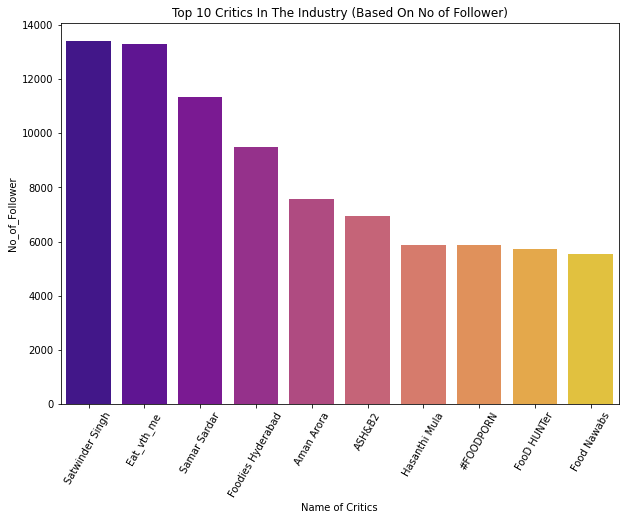

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critics.head(10), y='No_of_Follower', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=60)
plt.title('Top 10 Critics In The Industry (Based On No of Follower)')

# **Top 10 Critics in The Market (Based on No of Reviews Given)**

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
critic= newreview_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_review',ascending = False).reset_index()

In [ ]:
critic.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)
critic.head(10)

,Name of Critics,No_of_review,No_of_Follower,Mean_Rating,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
0,Anvesh Chowdary,1031.0,1654.0,3.333333,0.282407,0.646759
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0,794.0,2.000000,0.135450,0.589153
2,Abc098,665.0,2275.0,3.000000,0.302778,0.611111
3,Mithun Ravindranathan,560.0,2863.0,4.000000,0.257302,0.604802
4,Mohd Zubair Ali (Hyderabad.Food.Diaries),482.0,1688.0,4.000000,0.213417,0.602381
5,Bhargava Krishna,472.0,1302.0,3.500000,0.103030,0.630303
6,Epicurean Tales,452.0,2464.0,4.000000,0.271236,0.619533
7,Raghu,443.0,1016.0,3.416667,0.270342,0.450965
8,Aarti Kamath,417.0,5451.0,4.500000,0.154167,0.566250
9,Shrishail Deshnur,414.0,1047.0,3.500000,0.380556,0.638889


Text(0.5, 1.0, 'Top 10 Critics In The Industry(Based On Max Reviews)')

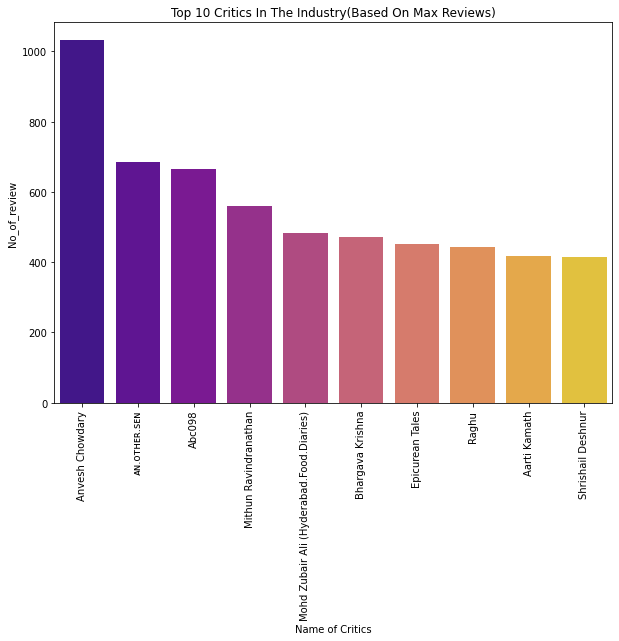

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critic.head(10), y='No_of_review', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Critics In The Industry(Based On Max Reviews)')

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9955 non-null   int64         
 1   Restaurant              9955 non-null   object        
 2   Reviewer                9955 non-null   object        
 3   Review                  9955 non-null   object        
 4   Rating                  9955 non-null   float64       
 5   Pictures                9955 non-null   int64         
 6   Date                    9955 non-null   datetime64[ns]
 7   Newtime                 9955 non-null   object        
 8   No_of_review            9955 non-null   float64       
 9   No_of_Follower          9955 non-null   float64       
 10  clean_review            9955 non-null   object        
 11  Sentiment_Polarity      9955 non-null   float64       
 12  Sentiment_Subjectivity  9955 non-null   float64 

# **2. Sentiment Analysis using VADER**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Lets Create function to get sentiments Analysis of the Review
def sentiment_Analysis(review):
    # Create a SentimentIntensityAnalyzer object.
    analyser = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    sentiment_dict = analyser.polarity_scores(review)   
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [ ]:
# Lets Create function to get sentiments Score of the Review
def sentiment_scores(review):
    # Create a SentimentIntensityAnalyzer object.
    analyser = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    sentiment_dict = analyser.polarity_scores(review)   
    return sentiment_dict['compound']

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9955 non-null   int64         
 1   Restaurant              9955 non-null   object        
 2   Reviewer                9955 non-null   object        
 3   Review                  9955 non-null   object        
 4   Rating                  9955 non-null   float64       
 5   Pictures                9955 non-null   int64         
 6   Date                    9955 non-null   datetime64[ns]
 7   Newtime                 9955 non-null   object        
 8   No_of_review            9955 non-null   float64       
 9   No_of_Follower          9955 non-null   float64       
 10  clean_review            9955 non-null   object        
 11  Sentiment_Polarity      9955 non-null   float64       
 12  Sentiment_Subjectivity  9955 non-null   float64 

In [ ]:
Review_df= newreview_df.copy()

In [ ]:
Review_df.drop(['Sentiment_Subjectivity','Sentiment_Polarity'], axis =1, inplace = True)

In [ ]:
Review_df['Sentiment_Score'] = Review_df['Review'].apply(sentiment_scores)
Review_df['Sentiment'] = Review_df['Review'].apply(sentiment_Analysis)

In [ ]:
Review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Pictures,Date,Newtime,No_of_review,No_of_Follower,clean_review,Sentiment,Sentiment_Score
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019-05-25,15:54:00,1.0,2.0,ambience good food quite good saturday lunch c...,Positive,0.9676
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019-05-25,14:20:00,3.0,2.0,ambience good pleasant evening service prompt ...,Positive,0.9360
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019-05-24,22:54:00,2.0,3.0,must try great food great ambience thnx servic...,Positive,0.9186
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019-05-24,22:11:00,1.0,1.0,soumen das arun great guy behavior sincerety g...,Positive,0.8591
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019-05-24,21:37:00,3.0,2.0,food good ordered kodi drumsticks basket mutto...,Positive,0.9245


In [ ]:
df1 = Review_df.groupby(by =Review_df.Restaurant)['Sentiment_Score','Rating'].mean().sort_values(by=['Sentiment_Score'],ascending = False).reset_index()

In [ ]:
df1.rename(columns={'Sentiment_Score' : 'Mean_Sentiment_Score','Rating':'Average_Rating'}, inplace = True)
df1.head(10)

,Restaurant,Mean_Sentiment_Score,Average_Rating
0,AB's - Absolute Barbecues,0.912901,4.880
1,B-Dubs,0.893630,4.810
2,The Indi Grill,0.868864,4.600
3,Zega - Sheraton Hyderabad Hotel,0.847623,4.450
4,Paradise,0.840984,4.700
5,Mazzo - Marriott Executive Apartments,0.827176,4.190
6,"3B's - Buddies, Bar & Barbecue",0.817134,4.760
7,Flechazo,0.813130,4.660
8,Prism Club & Kitchen,0.794556,4.215
9,The Fisherman's Wharf,0.782935,4.220


Text(0.5, 1.0, 'Sentiment Analysis Resaturantwise')

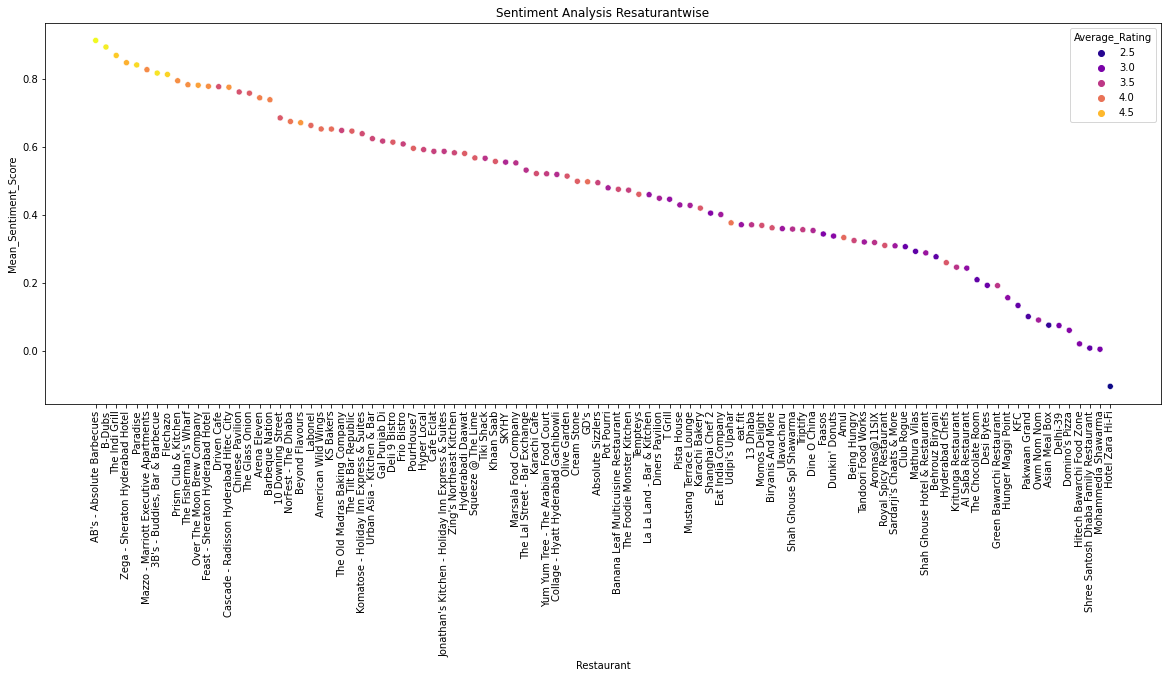

In [ ]:
# Lets find Sentiment Analysis Resaturantwise
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Score", x="Restaurant",
                hue="Average_Rating", palette="plasma",data=df1)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Sentiment Analysis Resaturantwise')

Text(0.5, 1.0, 'Average Ratings of Restaurants in Hyderabad')

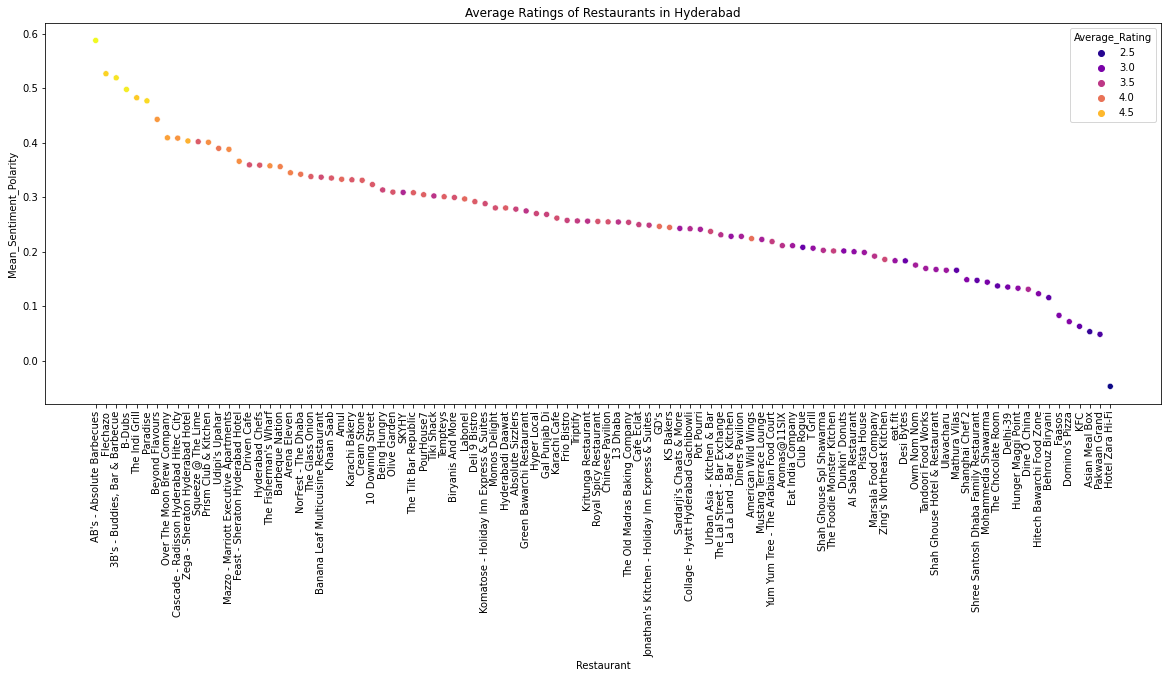

In [ ]:
# Lets find 'Average Ratings of Restaurants in Hyderabad'
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Polarity", x="Restaurant", hue ='Average_Rating',
                 palette="plasma",data=df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Average Ratings of Restaurants in Hyderabad')

Text(0.5, 1.0, 'Sentiment Analysis Resaturantwise')

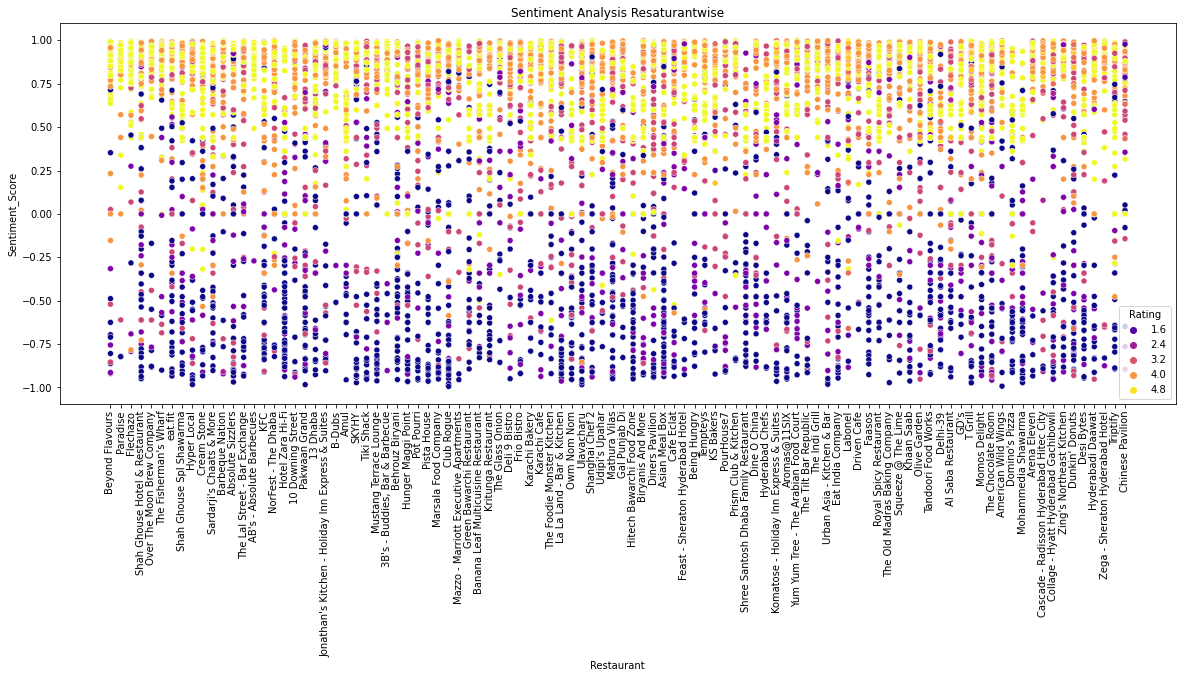

In [ ]:
# Lets find Sentiment Analysis Resaturantwise
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Sentiment_Score", x="Restaurant",
                hue="Rating", palette="plasma",data=Review_df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Sentiment Analysis Resaturantwise')

Text(0.5, 1.0, 'Sentiment Score Vs No of Reviews given by Custome')

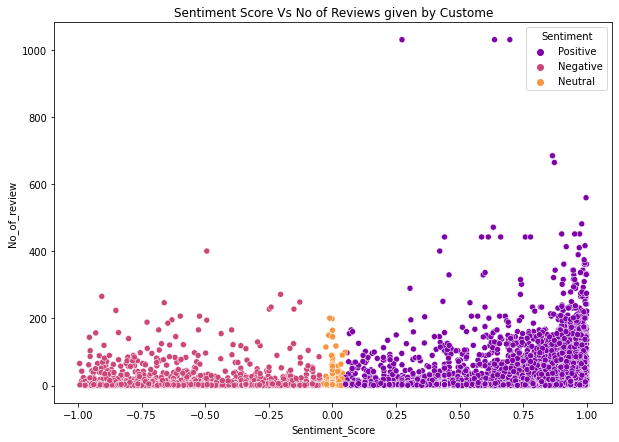

In [ ]:
# 'Sentiment Score Vs Customer Given No of Reviews
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="No_of_review",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs No of Reviews given by Custome')

Text(0.5, 1.0, 'Sentiment Score Vs Customer Having No of Follower')

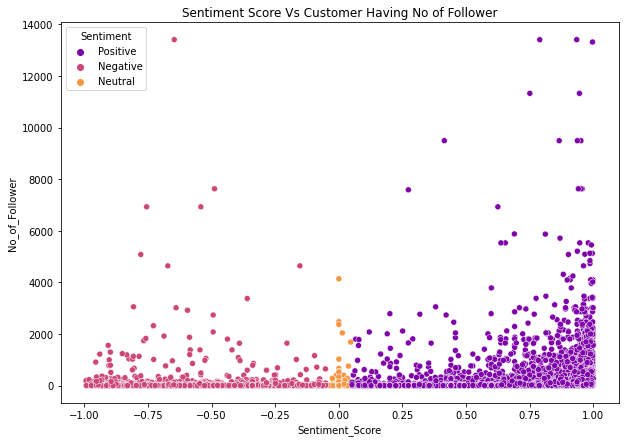

In [ ]:
# 'Sentiment Score Vs Customer Having No of Follower'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="No_of_Follower",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs Customer Having No of Follower')

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

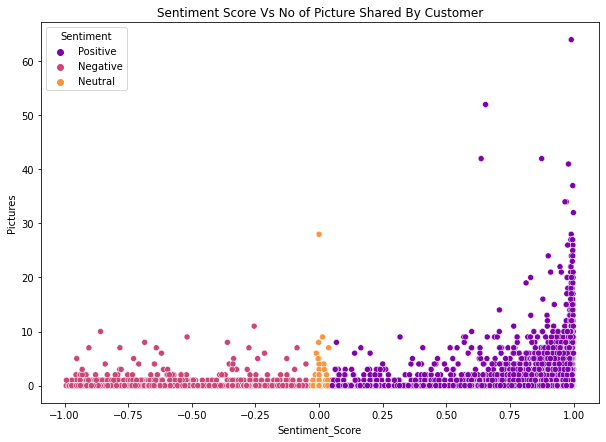

In [ ]:
# 'Sentiment Score Vs No of Picture Shared By Customer'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="Pictures",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

In [ ]:
from wordcloud import WordCloud

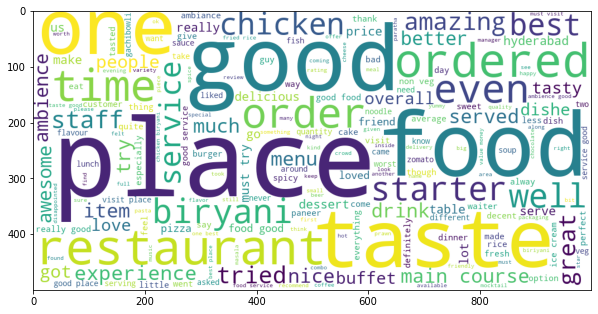

In [ ]:
 # Lets Findout the frequency or importance of the Words used by customer
word_cloud = ""
for row in newreview_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)